<a href="https://colab.research.google.com/github/Zidane06/UASvktexture/blob/main/texture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

In [11]:
def load_image(arr):
    strr = "Dataset/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

In [12]:
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

In [13]:
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

In [14]:
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

In [15]:
data=[]
data=load_image(data)

In [16]:
dataPreprocessed = preprocessing(data)

In [17]:
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


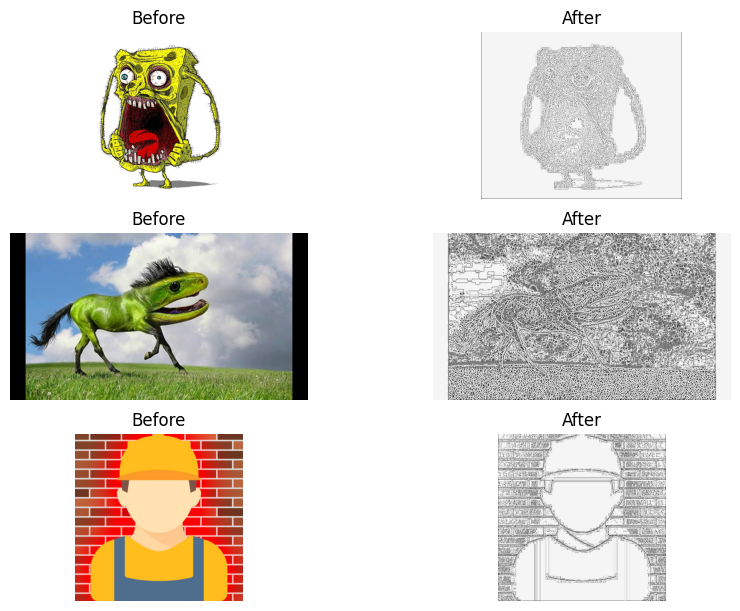

In [18]:
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [19]:
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.0286888  0.02077995 0.00500521 0.00200911 0.00105078 0.00098828
 0.00066536 0.00132943 0.00126432 0.00161328 0.00122656 0.00136458
 0.00094531 0.00952344 0.00163542 0.00951562 0.00172656 0.01015625
 0.00171094 0.0019987  0.00217318 0.00342708 0.00697266 0.01866667
 0.66026042 0.20530208]

Vector of Image 2 : [0.0286697  0.01192057 0.0135102  0.01379883 0.01323785 0.01325304
 0.01263021 0.01509006 0.01842665 0.02365343 0.03035156 0.04457574
 0.05116862 0.05376194 0.03562066 0.03325629 0.02337457 0.02547852
 0.01778971 0.01836914 0.01949761 0.02014865 0.01990126 0.01305556
 0.19175022 0.23770942]

Vector of Image 3 : [0.00780988 0.00996173 0.00576049 0.0039284  0.00315679 0.00281358
 0.00198395 0.00346296 0.00428395 0.00609506 0.00689012 0.0162
 0.04638025 0.06239383 0.01009877 0.02016667 0.01094815 0.0236284
 0.00969136 0.01342963 0.00995556 0.01301975 0.01449259 0.01554074
 0.48547037 0.19243704]
